<a href="https://colab.research.google.com/github/syedaftab-dev/Machine-learning/blob/main/decision_tree_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Diabetes Predictions***

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [17]:
import pandas as pd

df_diabetes = pd.DataFrame(dataset['data'], columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [18]:
X=df_diabetes
y=dataset['target']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [21]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

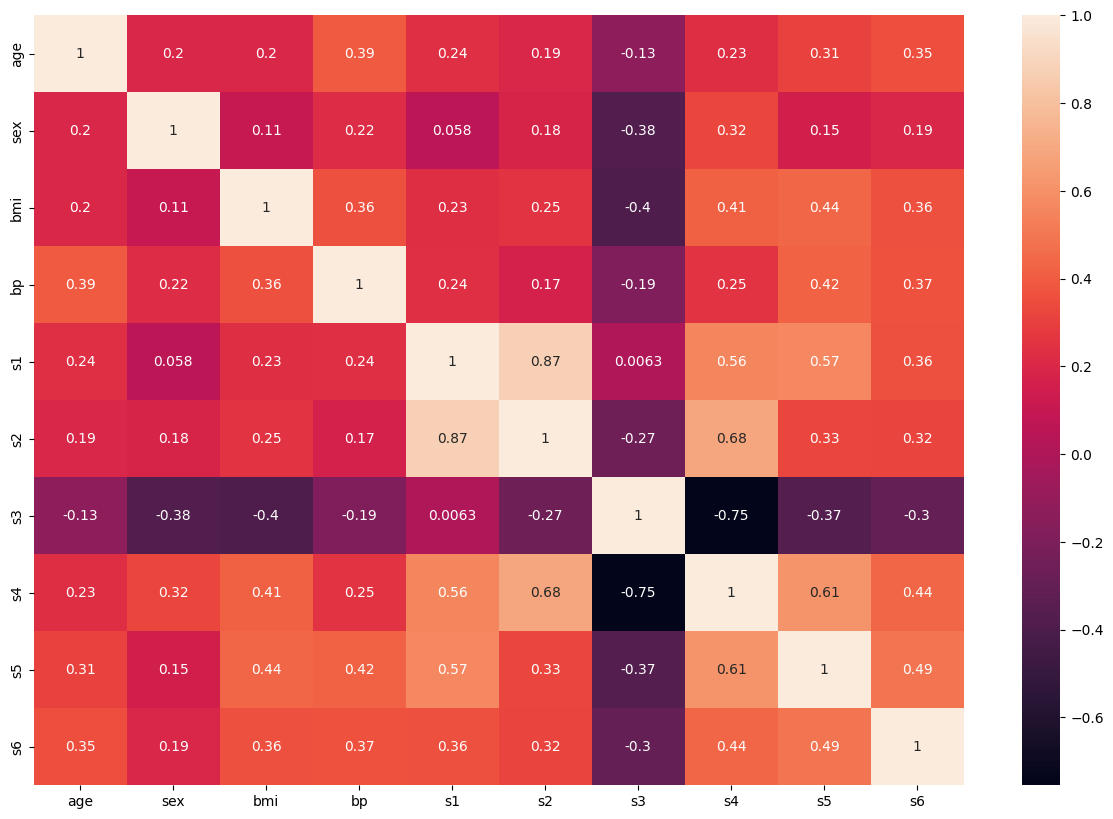

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
regressor=DecisionTreeRegressor()

In [26]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred=regressor.predict(X_test)

## Hyperparamter tunning for preventing overfitting

In [28]:
params={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid=GridSearchCV(regressor,params,cv=5,scoring='neg_mean_squared_error')

In [33]:
from warnings import filterwarnings
filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [34]:
y_pred=grid.predict(X_test)

In [39]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.44119831856087377
48.67776326109914
3535.913247496974


In [44]:
 ## visiulaize tree
 selectmodel=DecisionTreeRegressor(criterion='squared_error',max_depth=5,max_features='log2',splitter='random')
 selectmodel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', splitter='random')

[Text(0.4825, 0.9166666666666666, 'x[6] <= 0.077\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.21, 0.75, 'x[7] <= -0.037\nsquared_error = 5841.188\nsamples = 292\nvalue = 155.938'),
 Text(0.34625, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'x[2] <= 0.073\nsquared_error = 3462.893\nsamples = 91\nvalue = 112.912'),
 Text(0.08, 0.4166666666666667, 'x[3] <= 0.0\nsquared_error = 3261.605\nsamples = 90\nvalue = 111.289'),
 Text(0.04, 0.25, 'x[6] <= 0.041\nsquared_error = 2029.361\nsamples = 64\nvalue = 102.828'),
 Text(0.02, 0.08333333333333333, 'squared_error = 2472.383\nsamples = 39\nvalue = 114.769'),
 Text(0.06, 0.08333333333333333, 'squared_error = 768.8\nsamples = 25\nvalue = 84.2'),
 Text(0.12, 0.25, 'x[5] <= -0.024\nsquared_error = 5684.871\nsamples = 26\nvalue = 132.115'),
 Text(0.1, 0.08333333333333333, 'squared_error = 6850.204\nsamples = 14\nvalue = 158.286'),
 Text(0.14, 0.08333333333333333, 'squared_error = 2594.076\nsamples = 12\nvalue

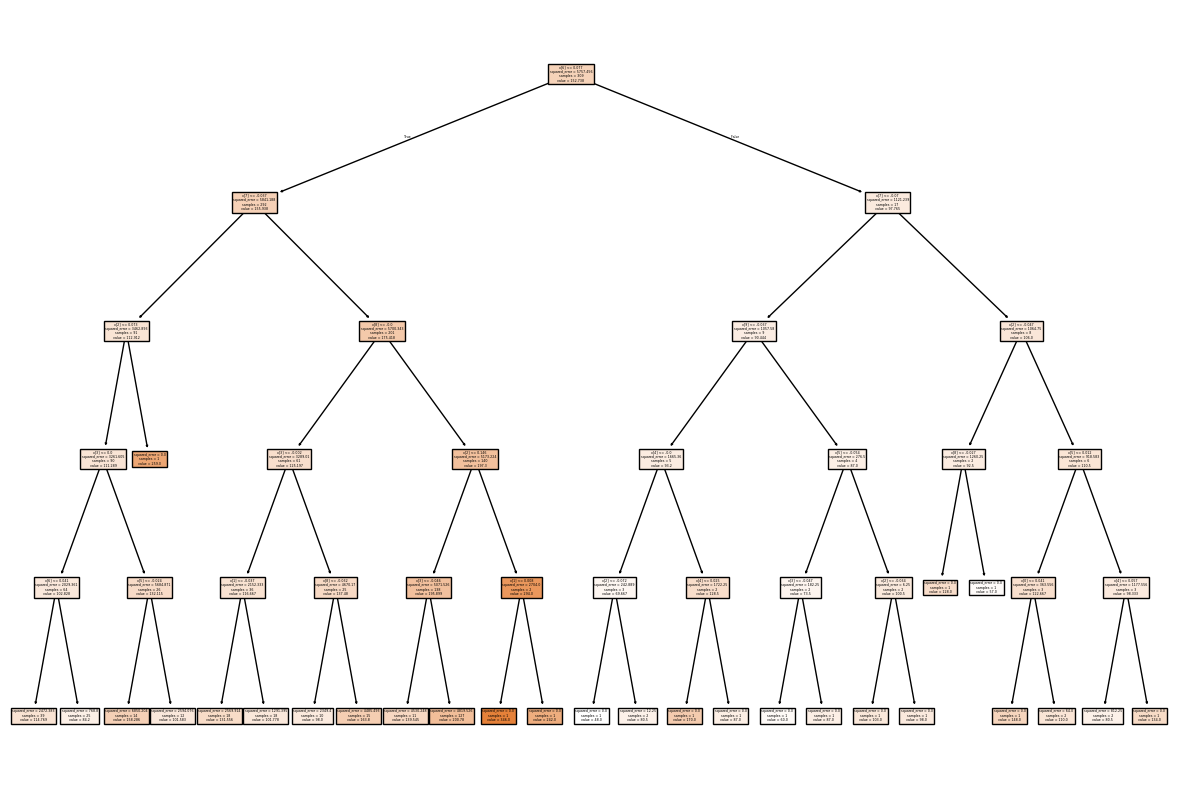

In [45]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)